<a href="https://colab.research.google.com/github/Yashmaini30/My_Own_Linear_Regression/blob/main/My_Own_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
import random
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)

samples=100000

X=10*np.random.rand(samples,1)

y=(3*X) + 2 + np.random.randn(samples,1)

df=pd.DataFrame(np.hstack((X,y)),columns=['Features_X','Target_y'])

print(df)
df.to_csv('sample_data_for_SLR(1 feature).csv',index=False)

       Features_X   Target_y
0        3.745401  14.078915
1        9.507143  33.045316
2        7.319939  23.859687
3        5.986585  17.762150
4        1.560186   8.105907
...           ...        ...
99995    7.923048  26.356608
99996    7.792529  24.012205
99997    6.744534  22.534421
99998    4.994472  18.123494
99999    3.899085  14.806262

[100000 rows x 2 columns]


In [2]:
df=pd.read_csv('sample_data_for_SLR(1 feature).csv')
# print(df.head)

#extract features
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)

#### formula to calculate the optimal parameters (weights) for linear regression using the Hat Matrix equation.
#### It minimizes the sum of squared errors between predicted and actual values.

# θ = (X^T * X)^-1 * X^T * y

#### Where:
#### - θ: Optimal parameters (weights).
#### - X: Design matrix (feature values with an added column of 1s for the intercept).
#### - X^T: Transpose of X.
#### - y: Target values.
#### - (X^T * X)^-1: Inverse of (X^T * X).

Closed-Form Solution: Intercept = 1.9998, Slope = 3.0006


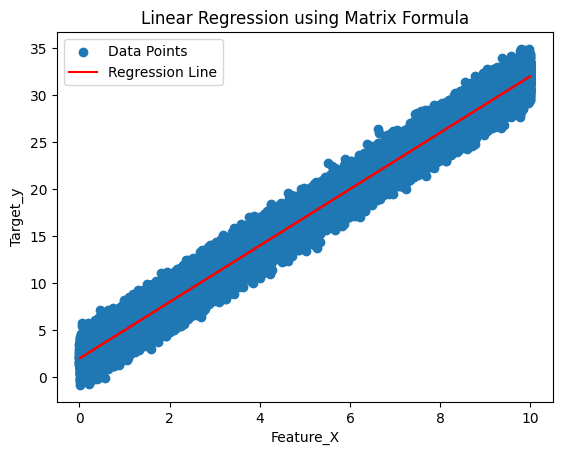

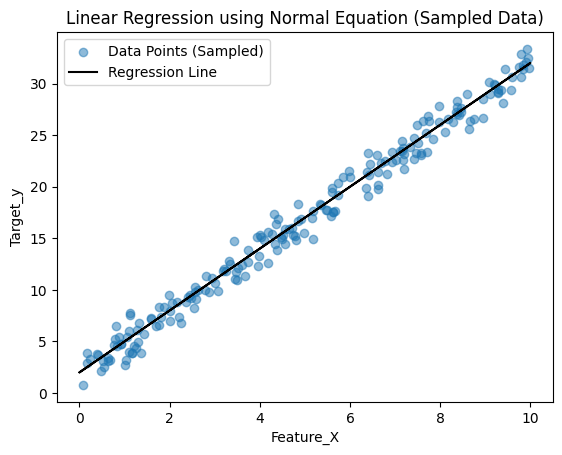

R-squared: 0.99
Mean Squared Error: 1.00


In [3]:
df=pd.read_csv('sample_data_for_SLR(1 feature).csv')

# Extract features and target
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)

# Add bias term or 1's coloumn
X_b = np.c_[np.ones((X.shape[0], 1)), X]

####Calculate the optimal parameters
# Calculate X transpose * X
XTX = X_b.T.dot(X_b)

# Calculate the inverse
XTX_inv = np.linalg.inv(XTX)

# Calculate (X transpose * y)
XTy = X_b.T.dot(y)

# calculate theta_best
theta_best = XTX_inv.dot(XTy)

# Extract learned parameters
b_best, m_best = theta_best.flatten()
print(f"Closed-Form Solution: Intercept = {b_best:.4f}, Slope = {m_best:.4f}")

# Plot result
plt.scatter(X, y, label="Data Points")
plt.plot(X, X_b.dot(theta_best), color='red', label="Regression Line")
plt.xlabel("Feature_X")
plt.ylabel("Target_y")
plt.title("Linear Regression using Matrix Formula")
plt.legend()
plt.show()

# For 200 random sampls
sample_indices = random.sample(range(len(X)), 200)
plt.scatter(X[sample_indices], y[sample_indices], label="Data Points (Sampled)", alpha=0.5)
plt.plot(X, X_b.dot(theta_best), color='black', label="Regression Line")
plt.xlabel("Feature_X")
plt.ylabel("Target_y")
plt.title("Linear Regression using Normal Equation (Sampled Data)")
plt.legend()
plt.show()

# Evaluate the model
y_pred = X_b.dot(theta_best)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

In [4]:
# Load Data
df = pd.read_csv('sample_data_for_SLR(1 feature).csv')
X = df['Features_X'].values.reshape(-1, 1)
y = df['Target_y'].values.reshape(-1, 1)

# Normalize X for better performance
X = (X - np.mean(X)) / np.std(X)

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]
m = len(X)

# Select 200 random points for scatter plot
sample_indices = random.sample(range(m), 200)
X_sample = X[sample_indices]
y_sample = y[sample_indices]

# Gradient Descent Function
def gradient_descent(alpha, num_iterations):
    theta = np.random.randn(2, 1)
    for _ in range(num_iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= alpha * gradients
    return theta

# Normal Equation (for Best Fit)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Define Learning Rates
learning_rates = {
    "Very Low (0.0001)": 0.0001,
    "Best (0.01)" : 0.01,
    "Very High (1.0)": 1.0
}

# Train Models
results = {}
for label, lr in learning_rates.items():
    theta = gradient_descent(lr, 1000)
    y_pred = X_b.dot(theta)

    # Evaluate Model
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    results[label] = {"Theta": theta, "R² Score": r2, "MSE": mse, "Predictions": y_pred}

# Sort X for correct line plotting
sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices]
X_b_sorted = X_b[sorted_indices]

# Display Model Performance
for label, result in results.items():
    print(f"\nLearning Rate: {label}")
    print(f"  - Theta: {result['Theta'].flatten()}")
    print(f"  - R² Score: {result['R² Score']:.4f}")
    print(f"  - MSE: {result['MSE']:.4f}")


Learning Rate: Very Low (0.0001)
  - Theta: [4.77584194 0.80157817]
  - R² Score: -1.7916
  - MSE: 211.7421

Learning Rate: Best (0.01)
  - Theta: [16.98726331  8.65185342]
  - R² Score: 0.9869
  - MSE: 0.9965

Learning Rate: Very High (1.0)
  - Theta: [0.24561857 0.43861489]
  - R² Score: -3.5976
  - MSE: 348.7365


Intercept (b0): 1.9998
Slope (b1): 3.0006
R² Score: 0.9869
Mean Squared Error: 0.9965


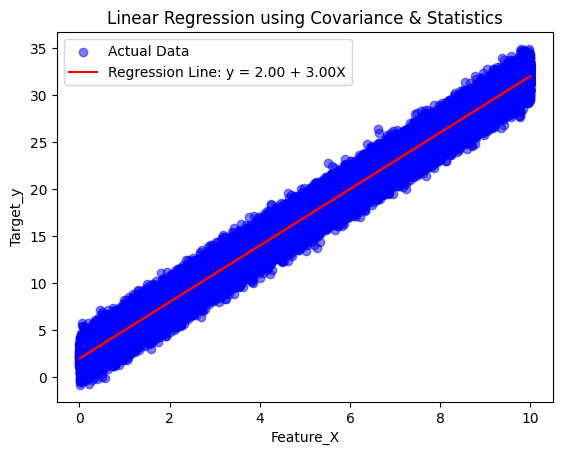

In [7]:
# Load Data
df = pd.read_csv('sample_data_for_SLR(1 feature).csv')
X = df['Features_X'].values
y = df['Target_y'].values

# Compute means
X_mean = np.mean(X)
y_mean = np.mean(y)

# Compute covariance
covariance = np.sum((X - X_mean) * (y - y_mean))

# Compute variance of X
variance_X = np.sum((X - X_mean) ** 2)

# Compute slope (b1) and intercept (b0)
b1 = covariance / variance_X
b0 = y_mean - b1 * X_mean

# Make predictions
y_pred = b0 + b1 * X

# Evaluate Model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Display results
print(f"Intercept (b0): {b0:.4f}")
print(f"Slope (b1): {b1:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Scatter plot of actual data
plt.scatter(X, y, label="Actual Data", alpha=0.5, color="blue")

# Regression line
plt.plot(X, y_pred, color="red", label=f"Regression Line: y = {b0:.2f} + {b1:.2f}X")

# Labels and legend
plt.xlabel("Feature_X")
plt.ylabel("Target_y")
plt.title("Linear Regression using Covariance & Statistics")
plt.legend()
plt.show()
